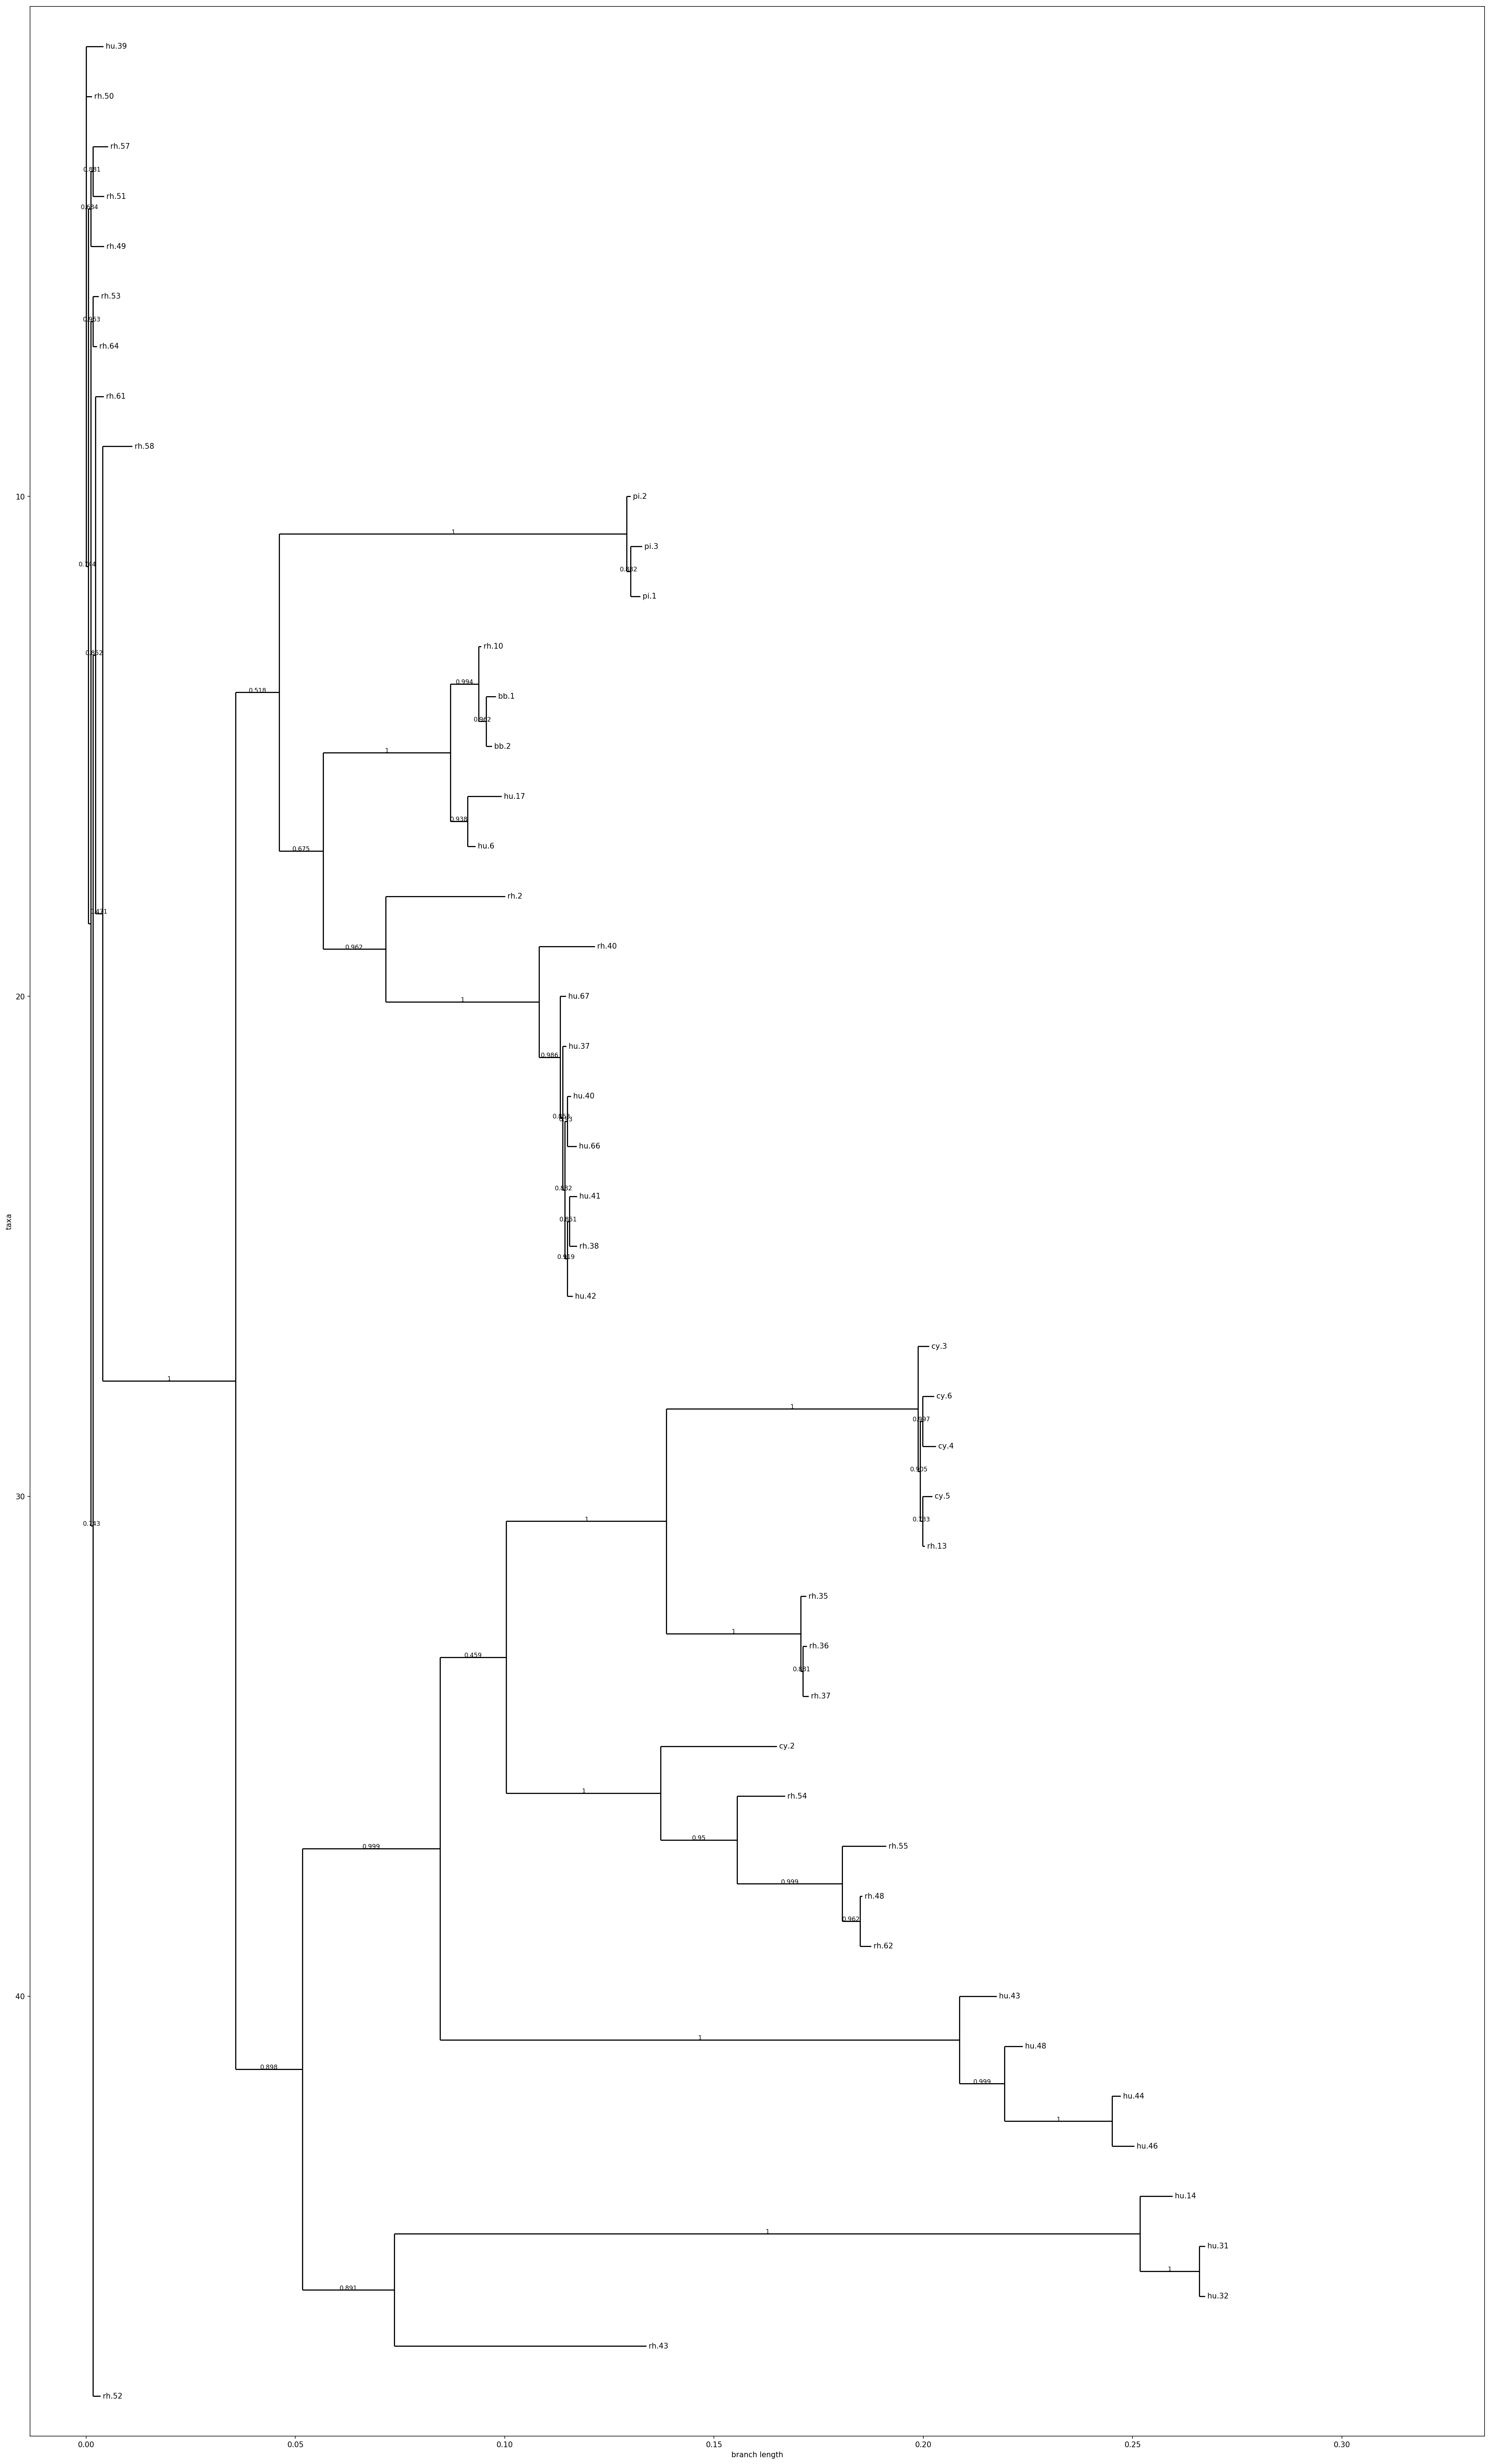

In [28]:
%matplotlib inline
from Bio import Phylo
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35, 60),dpi=150)
axes=fig.add_subplot(1,1,1)
tree=Phylo.read("tree.nwk","newick")
Phylo.draw(tree,axes=axes)

In [64]:
from Bio import SeqIO
Cluster=["rh.50","pi.3","rh.52"]
for rec in SeqIO.parse("seqs.aligned.fa","fasta"):
    for specimen in Cluster:
        if specimen ==rec.name:
            print(rec.name," ",rec.seq,"\n")

pi.3   ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGCGCTGAAACCTGGAGCCCCGCAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGAGGCGGACGCCGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAATCACGCCGACGCCGAGTTTCAAGAGCGTCTGCAAGAAGATACGTCCTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAAAAGAGGGTACTCGAGCCTCTGGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGCGGCCAGTAGAACCG------------------GACTCCAGCTCGGGCATCGGCAAGTCAGGCCAGCAGCCCGCGAAAAAGAGACTGAATTTTGGGCCGACTGGCGACTCAGAGTCAGTGCCTGACCCCCAACCTCTCTCAGAACCACCTGCAGGTCCCTCTGGTCTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCTCCAATGGCAGACAATAACGAAGGCGCCGACGGAGTGGGTAATGTCTCAGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACCGAGTCATCACCACCAGCACTCGGACCTGGGCCCTCCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACCTCGGGAGGCAGCAGCAACGACAACACCTACTTTGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTTTCACCACGCGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAAGCTCAACTTCAAGCTCTTCAACATCCAGGTCAAGGAGGTCACCCAGAATGAAGGC

top 5 of the most common matches for pi.3 are as below:
Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate pi.2 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate pi.1 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate Anc84 capsid protein (VP1) gene, complete cds
Non-human primate Adeno-associated virus isolate AAVrh.14 capsid protein (VP1) gene, complete cds

top 5 of the most common matches for rh.50 are as below:
Adeno-associated virus isolate rh.50 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds
Adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds
Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate rh.53 capsid protein VP1 (cap) gene, complete cds

top 5 of the most common matches for rh.52 are as below:
Adeno-associated virus isolate rh.52 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds
Adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds
Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene, complete cds
Adeno-associated virus isolate rh.53 capsid protein VP1 (cap) gene, complete cds

The listed sequences for each cluster that come up in the BLAST are almost identical. At least, top 5 of most common matches for one cluster can be found in match-list of other two clusters as well. In other world, all of these three clusters match the same gene, cap gene.However, they match other gene like VP1.This cause a distrust issue of annotations for sequences in BLAST because an unknown gene can be annotated as a few different genes. 


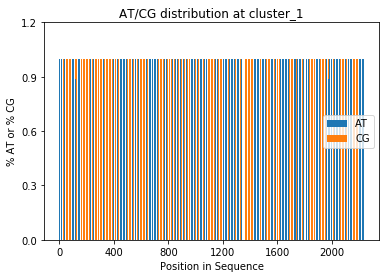

In [6]:
from Bio import SeqIO,AlignIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
j = 0
s = 0 ## to count # of valid nucleotides at same position
at=[] ## fraction of A or T at each position
cg=[] ## fraction of C or G at each position
count_at=[0] * 2238 
count_cg=[0] * 2238
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
align = AlignIO.read("seqs.aligned.fa","fasta")
##Manual Categoriztion of Three Clusters
for record in align:
    if record.id in ['hu.39','rh.50','rh.57','rh.51','rh.49','rh.53','rh.64','rh.61','rh.58']:
        cluster_1.append(record.seq)
    elif record.id in ['rh.52']:
        cluster_3.append(record.seq)
    elif record.id in ['pi.2','pi.3','pi.1','rh.10','bb.1','bb.2','hu.17','hu.6','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.41','rh.38','hu.42']:
        cluster_4.append(record.seq)
    else:
        cluster_2.append(record.seq)
## draw a plot for cluster 1
while j < 2238:
    while i < len(cluster_1):
        if cluster_1[i][j] =="A" or cluster_1[i][j]=="T":
            count_at[j] += 1
            s+=1
        elif cluster_1[i][j] =="C" or cluster_1[i][j]=="G":
            count_cg[j] += 1
            s+=1
        i += 1
    if s == 0:
        at.append(count_at[j])
        cg.append(count_cg[j])
    else:
        at.append(count_at[j]/s)
        cg.append(count_cg[j]/s)
    j += 1
    i = 0 #reset i to 0 for loop 
    s = 0 #reset s to 0 for loop
    
N = 2238
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, at, width)
p2 = plt.bar(ind, cg, width,bottom=at)

plt.ylabel('% AT or % CG')
plt.xlabel('Position in Sequence')
plt.title('AT/CG distribution at cluster_1')
plt.xticks(np.arange(0, 2250, 400))
plt.yticks(np.arange(0, 1.5, 0.3))
plt.legend((p1[0], p2[0]), ('AT', 'CG'))

plt.show()

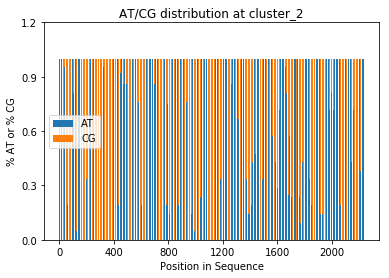

In [5]:
from Bio import SeqIO,AlignIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
j = 0
s = 0 ## to count # of valid nucleotides at certain position over all specimens in the same cluster
at=[] ## fraction of A or T at each position
cg=[] ## fraction of C or G at each position
count_at=[0] * 2238 
count_cg=[0] * 2238
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
align = AlignIO.read("seqs.aligned.fa","fasta")
##Manual Categoriztion of Three Clusters
for record in align:
    if record.id in ['hu.39','rh.50','rh.57','rh.51','rh.49','rh.53','rh.64','rh.61','rh.58']:
        cluster_1.append(record.seq)
    elif record.id in ['rh.52']:
        cluster_3.append(record.seq)
    elif record.id in ['pi.2','pi.3','pi.1','rh.10','bb.1','bb.2','hu.17','hu.6','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.41','rh.38','hu.42']:
        cluster_4.append(record.seq)
    else:
        cluster_2.append(record.seq)
## draw a plot for cluster 2
while j < 2238:
    while i < len(cluster_2):
        if cluster_2[i][j] =="A" or cluster_2[i][j]=="T":
            count_at[j] += 1
            s+=1
        elif cluster_2[i][j] =="C" or cluster_2[i][j]=="G":
            count_cg[j] += 1
            s+=1
        i += 1
    if s == 0:
        at.append(count_at[j])
        cg.append(count_cg[j])
    else:
        at.append(count_at[j]/s)
        cg.append(count_cg[j]/s)
    j += 1
    i = 0 #reset i to 0 for loop 
    s = 0 #reset s to 0 for loop
    
N = 2238
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, at, width)
p2 = plt.bar(ind, cg, width,bottom=at)

plt.ylabel('% AT or % CG')
plt.xlabel('Position in Sequence')
plt.title('AT/CG distribution at cluster_2')
plt.xticks(np.arange(0, 2250, 400))
plt.yticks(np.arange(0, 1.5, 0.3))
plt.legend((p1[0], p2[0]), ('AT', 'CG'))

plt.show()

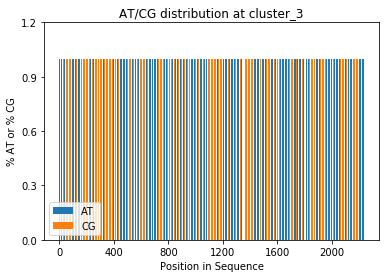

In [7]:
from Bio import SeqIO,AlignIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
j = 0
s = 0 ## to count # of valid nucleotides at same position
at=[] ## fraction of A or T at each position
cg=[] ## fraction of C or G at each position
count_at=[0] * 2238 
count_cg=[0] * 2238
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
align = AlignIO.read("seqs.aligned.fa","fasta")
##Manual Categoriztion of Three Clusters
for record in align:
    if record.id in ['hu.39','rh.50','rh.57','rh.51','rh.49','rh.53','rh.64','rh.61','rh.58']:
        cluster_1.append(record.seq)
    elif record.id in ['rh.52']:
        cluster_3.append(record.seq)
    elif record.id in ['pi.2','pi.3','pi.1','rh.10','bb.1','bb.2','hu.17','hu.6','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.41','rh.38','hu.42']:
        cluster_4.append(record.seq)
    else:
        cluster_2.append(record.seq)
## draw a plot for cluster 3
while j < 2238:
    while i < len(cluster_3):
        if cluster_3[i][j] =="A" or cluster_3[i][j]=="T":
            count_at[j] += 1
            s+=1
        elif cluster_3[i][j] =="C" or cluster_3[i][j]=="G":
            count_cg[j] += 1
            s+=1
        i += 1
    if s == 0:
        at.append(count_at[j])
        cg.append(count_cg[j])
    else:
        at.append(count_at[j]/s)
        cg.append(count_cg[j]/s)
    j += 1
    i = 0 #reset i to 0 for loop 
    s = 0 #reset s to 0 for loop
    
N = 2238
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, at, width)
p2 = plt.bar(ind, cg, width,bottom=at)

plt.ylabel('% AT or % CG')
plt.xlabel('Position in Sequence')
plt.title('AT/CG distribution at cluster_3')
plt.xticks(np.arange(0, 2250, 400))
plt.yticks(np.arange(0, 1.5, 0.3))
plt.legend((p1[0], p2[0]), ('AT', 'CG'))

plt.show()




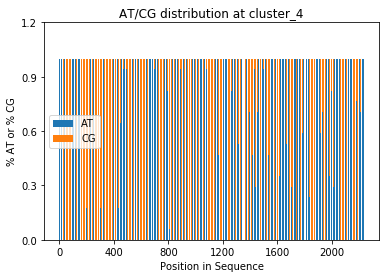

In [11]:
from Bio import SeqIO,AlignIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
j = 0
s = 0 ## to count # of valid nucleotides at same position
at=[] ## fraction of A or T at each position
cg=[] ## fraction of C or G at each position
count_at=[0] * 2238 
count_cg=[0] * 2238
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
align = AlignIO.read("seqs.aligned.fa","fasta")
##Manual Categoriztion of Three Clusters
for record in align:
    if record.id in ['hu.39','rh.50','rh.57','rh.51','rh.49','rh.53','rh.64','rh.61','rh.58']:
        cluster_1.append(record.seq)
    elif record.id in ['rh.52']:
        cluster_3.append(record.seq)
    elif record.id in ['pi.2','pi.3','pi.1','rh.10','bb.1','bb.2','hu.17','hu.6','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.41','rh.38','hu.42']:
        cluster_4.append(record.seq)
    else:
        cluster_2.append(record.seq)
## draw a plot for cluster 3
while j < 2238:
    while i < len(cluster_4):
        if cluster_4[i][j] =="A" or cluster_4[i][j]=="T":
            count_at[j] += 1
            s+=1
        elif cluster_4[i][j] =="C" or cluster_4[i][j]=="G":
            count_cg[j] += 1
            s+=1
        i += 1
    if s == 0:
        at.append(count_at[j])
        cg.append(count_cg[j])
    else:
        at.append(count_at[j]/s)
        cg.append(count_cg[j]/s)
    j += 1
    i = 0 #reset i to 0 for loop 
    s = 0 #reset s to 0 for loop
    
N = 2238
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, at, width)
p2 = plt.bar(ind, cg, width,bottom=at)

plt.ylabel('% AT or % CG')
plt.xlabel('Position in Sequence')
plt.title('AT/CG distribution at cluster_4')
plt.xticks(np.arange(0, 2250, 400))
plt.yticks(np.arange(0, 1.5, 0.3))
plt.legend((p1[0], p2[0]), ('AT', 'CG'))

plt.show()

[2214, 2187, 2187, 2187, 2187, 2211, 2211, 2211, 2214, 2211, 2211, 2211, 2187, 2190, 2190, 2190, 2211, 2214, 2214, 2214, 2214]


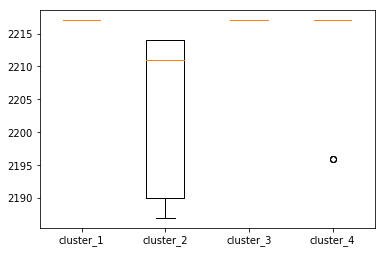

In [15]:
from Bio import SeqIO,AlignIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
for record in SeqIO.parse("seqs.fa","fasta"): ## indentify whihc cluseter is each specimen belong to
    if record.id in ['hu.39','rh.50','rh.57','rh.51','rh.49','rh.53','rh.64','rh.61','rh.58']:
        cluster_1.append(len(record.seq))
    elif record.id in ['rh.52']:
        cluster_3.append(len(record.seq))
    elif record.id in ['pi.2','pi.3','pi.1','rh.10','bb.1','bb.2','hu.17','hu.6','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.41','rh.38','hu.42']:
        cluster_4.append(len(record.seq))
    else:
        cluster_2.append(len(record.seq))
print(cluster_2)

data_to_plot=[cluster_1,cluster_2,cluster_3,cluster_4]
line_out=plt.boxplot(data_to_plot,labels=['cluster_1','cluster_2','cluster_3','cluster_4'])